In [1]:
!pip install dash

In [3]:
import dash
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
import seaborn as sns

# Load the CSV data
url = 'Global.xlsx'
df = pd.read_excel(url)

In [62]:
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,1.084000e+08,2000000,2006,Mar,13,1366417754,5.36,471031528,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,5.800000e-01,0,2006,Mar,5,328239523,14.70,270663028,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,6.470000e+07,8000000,2012,Feb,20,328239523,14.70,270663028,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,9.480000e+07,1000000,2006,Sep,1,328239523,14.70,270663028,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,8.750000e+07,1000000,2006,Sep,20,1366417754,5.36,471031528,20.593684,78.962880


In [63]:
df.tail(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Population,Unemployment rate,Urban_population,Latitude,Longitude
864,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,26500000.0,700000,2017,Feb,12,212559417,12.08,183241641,-14.235004,-51.925280
865,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,3100000.0,300000,2018,Sep,14,1366417754,5.36,471031528,20.593684,78.962880
866,993,Panda,12300000,2214684303,other,HybridPanda,2452,United Kingdom,GB,Games,...,3200.0,1000,2006,Sep,11,66834405,3.85,55908316,55.378051,-3.435973
867,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,185800.0,100000,2012,May,9,10285453,6.48,9021165,60.128161,18.643501
868,995,Make Joke Of,12300000,2129773714,Comedy,Make Joke Of,62,India,IN,Comedy,...,1200000.0,100000,2017,Aug,1,1366417754,5.36,471031528,20.593684,78.962880


In [64]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Population,Unemployment rate,Urban_population,Latitude,Longitude
count,869.000000,8.690000e+02,8.690000e+02,869.000000,8.690000e+02,869.000000,869.000000,8.690000e+02,869.000000,8.690000e+02,8.690000e+02,8.690000e+02,8.690000e+02,869.000000,869.000000,8.690000e+02,869.000000,8.690000e+02,869.000000,869.000000
mean,504.672037,2.288113e+07,1.125996e+10,10443.836594,2.662885e+05,370.363636,421.570771,1.783182e+08,39377.646893,6.295787e+05,4.721822e+05,7.560478e+06,2.417647e+05,2012.475259,15.531646,4.312211e+08,9.274430,2.244416e+08,26.727510,-14.160967
std,287.598614,1.787333e+07,1.481442e+10,36372.044973,9.629245e+05,1194.886918,1381.395436,4.236603e+08,73031.734684,1.167474e+06,8.753266e+05,1.402204e+07,5.326672e+05,4.418843,8.878233,4.733407e+08,4.890517,1.547877e+08,20.470304,84.703650
min,1.000000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1970.000000,1.000000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,260.000000,1.450000e+07,4.266957e+09,296.000000,2.870000e+02,11.000000,25.000000,2.320600e+07,5100.000000,8.110000e+04,6.080000e+04,9.726000e+05,0.000000e+00,2009.000000,8.000000,8.342962e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,511.000000,1.760000e+07,7.739048e+09,887.000000,8.050000e+02,51.000000,60.000000,6.638800e+07,15800.000000,2.532000e+05,1.899000e+05,3.000000e+06,1.000000e+05,2013.000000,15.000000,3.282395e+08,9.020000,2.706630e+08,37.090240,-51.925280
75%,752.000000,2.410000e+07,1.356285e+10,3254.000000,2.313000e+03,123.000000,132.000000,1.690560e+08,40800.000000,6.525000e+05,4.894000e+05,7.800000e+06,3.000000e+05,2016.000000,23.000000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7670.000000,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08,8.000000e+06,2022.000000,31.000000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              869 non-null    int64  
 1   Youtuber                          869 non-null    object 
 2   subscribers                       869 non-null    int64  
 3   video views                       869 non-null    int64  
 4   category                          869 non-null    object 
 5   Title                             869 non-null    object 
 6   uploads                           869 non-null    int64  
 7   Country                           869 non-null    object 
 8   Abbreviation                      869 non-null    object 
 9   channel_type                      869 non-null    object 
 10  video_views_rank                  869 non-null    int64  
 11  country_rank                      869 non-null    int64  
 12  channel_

Axes(0.125,0.11;0.775x0.77)


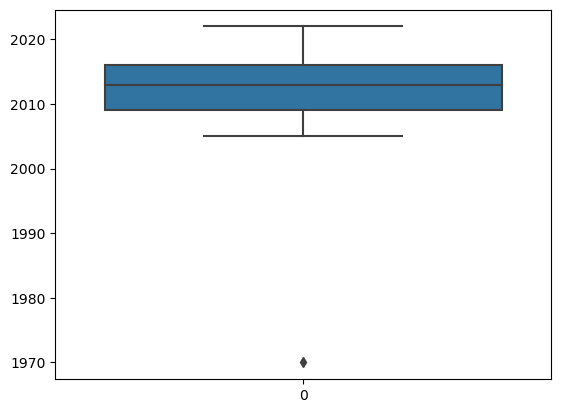

In [8]:
# checking for the outlier
print(sns.boxplot(df["created_year"]))

In [4]:
# Filter rows where 'created_year' is greater than or equal to 2005
df1 = df[df['created_year'] >= 2005]
df1

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,228000000000,Music,T-Series,20082,India,IN,Music,...,1.084000e+08,2000000,2006,Mar,13,1366417754,5.36,471031528,20.593684,78.962880
1,2,YouTube Movies,170000000,0,Film & Animation,youtubemovies,1,United States,US,Games,...,5.800000e-01,0,2006,Mar,5,328239523,14.70,270663028,37.090240,-95.712891
2,3,MrBeast,166000000,28368841870,Entertainment,MrBeast,741,United States,US,Entertainment,...,6.470000e+07,8000000,2012,Feb,20,328239523,14.70,270663028,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,9.480000e+07,1000000,2006,Sep,1,328239523,14.70,270663028,37.090240,-95.712891
4,5,SET India,159000000,148000000000,Shows,SET India,116536,India,IN,Entertainment,...,8.750000e+07,1000000,2006,Sep,20,1366417754,5.36,471031528,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,991,Natan por Aï¿,12300000,9029609749,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,2.650000e+07,700000,2017,Feb,12,212559417,12.08,183241641,-14.235004,-51.925280
865,992,Free Fire India Official,12300000,1674409945,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,3.100000e+06,300000,2018,Sep,14,1366417754,5.36,471031528,20.593684,78.962880
866,993,Panda,12300000,2214684303,other,HybridPanda,2452,United Kingdom,GB,Games,...,3.200000e+03,1000,2006,Sep,11,66834405,3.85,55908316,55.378051,-3.435973
867,994,RobTopGames,12300000,374123483,Gaming,RobTopGames,39,Sweden,SE,Games,...,1.858000e+05,100000,2012,May,9,10285453,6.48,9021165,60.128161,18.643501


<Axes: >

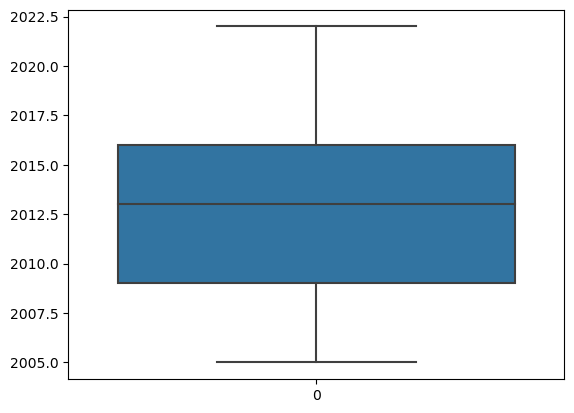

In [9]:
sns.boxplot(df1["created_year"])

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 868 entries, 0 to 868
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rank                              868 non-null    int64  
 1   Youtuber                          868 non-null    object 
 2   subscribers                       868 non-null    int64  
 3   video views                       868 non-null    int64  
 4   category                          868 non-null    object 
 5   Title                             868 non-null    object 
 6   uploads                           868 non-null    int64  
 7   Country                           868 non-null    object 
 8   Abbreviation                      868 non-null    object 
 9   channel_type                      868 non-null    object 
 10  video_views_rank                  868 non-null    int64  
 11  country_rank                      868 non-null    int64  
 12  channel_

# Top 10 YouTubers by Subscribers

In [15]:
fig1 = px.bar(df1.head(10), x='Youtuber', y='subscribers', title='Top 10 YouTubers by Subscribers')
fig1.show()

# Geographic Distribution of Viewers

In [66]:
fig2 = px.scatter_geo(df1, lat='Latitude', lon='Longitude', size='video views', projection='natural earth',
                      animation_frame='category',title='Geographic Distribution of Viewers',height=500,width=1000)
fig2.show()

# Total Video Uploads by Year

In [48]:
df2 = df1[['created_year','uploads']]
df2

,created_year,uploads
0,2006,20082
1,2006,1
2,2012,741
3,2006,966
4,2006,116536
...,...,...
864,2017,1200
865,2018,1500
866,2006,2452
867,2012,39


In [52]:
sum_uploads_by_year = df2.groupby('created_year')['uploads'].sum().reset_index()

# Create the bar plot
# plt.figure(figsize=(10, 6))
fig3 = px.bar(sum_uploads_by_year, x='created_year', y='uploads',title='Total video Uploads by Year')
fig3.show()

# Top 5 Countries and Their Top 5 Categories

In [53]:
# Calculate total viewers and subscribers by grouping by 'Country' and 'category'
grouped_df = df1.groupby(['Country', 'category']).agg({'video views': 'sum', 'subscribers': 'sum'}).reset_index()

In [54]:
# Find the top 5 countries by total 'video views'
top_5_countries = grouped_df.groupby('Country').agg({'video views': 'sum'}).nlargest(5, 'video views').index.tolist()

In [55]:
# Filter the DataFrame to include only data for the top 5 countries
top_5_countries_df = grouped_df[grouped_df['Country'].isin(top_5_countries)]

In [56]:
# Sort the data to get the top 5 categories within each of the top 5 countries
top_5_countries_categories_df = top_5_countries_df.groupby('Country').apply(lambda x: x.nlargest(5, 'video views')).reset_index(drop=True)

In [57]:
# Create the sunburst chart
fig4 = px.sunburst(top_5_countries_categories_df, path=['Country', 'category'],
                  values='video views',
                  hover_name='category',
                  hover_data={'video views', 'subscribers'},
                  title='Sunburst Chart: Top 5 Countries and Their Top 5 Categories')

# Show the chart
fig4.show()

# YouTube Subscribers Growth Over the Years

In [58]:
# Group the data by 'created_year' and sum the 'subscribers' for each year
subscribers_growth = df1.groupby('created_year')['subscribers'].sum().reset_index()

In [59]:
# Create a line chart
fig5 = px.line(subscribers_growth, x='created_year', y='subscribers',
              title='YouTube Subscribers Growth Over the Years',
              labels={'created_year': 'Year', 'subscribers': 'Total Subscribers'})

# Show the chart
fig5.show()

# Creating Dashboard

In [67]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Global YouTube Statistics Dashboard"),

    # Dropdown to select a chart
    dcc.Dropdown(
        id='chart-dropdown',
        options=[
            {'label': 'Top 10 YouTubers', 'value': 'top-10-youtubers'},
            {'label': 'Geographic Distribution of Viewers', 'value': 'geo-plot'},
            {'label': 'Top 5 Years of Channel Creation', 'value': 'Total Uploads by Year'},
            {'label': 'Sunburst Chart', 'value': 'sunburst-chart'},
            {'label': "YouTube Subscribers Growth Over the Years", 'value': 'top-5-growing-channels'},
        ],
        value='top-10-youtubers'  # Default chart
    ),

    # Chart container
    dcc.Graph(id='selected-chart'),
])

# Callback to update the displayed chart based on the selected value
@app.callback(
    Output('selected-chart', 'figure'),
    Input('chart-dropdown', 'value')
)
def update_selected_chart(selected_chart):
    # Replace these placeholders with your actual chart logic
    # You can use Plotly Express or Plotly.graph_objects to create the charts

    if selected_chart == 'top-10-youtubers':
        fig = fig1
    elif selected_chart == 'geo-plot':
        fig = fig2   
    elif selected_chart == 'Total Uploads by Year':
        fig = fig3   
    elif selected_chart == 'sunburst-chart':
        fig = fig4
    elif selected_chart == 'top-5-growing-channels':
        fig = fig5
    else:
        fig = None  # Default to None if an invalid chart is selected

    return fig


if __name__ == '__main__':
    app.run_server(debug=True, port=8061)
